In [1]:
import pandas as pd
import numpy as np

In [2]:
train_windows = pd.read_csv("train_windows.csv")
test_windows = pd.read_csv("test_windows.csv")
dev_windows = pd.read_csv("dev_windows.csv")

We remove "_" class, as it doesn't serve a purpose for the classification (X is "others" class).

In [3]:
train_windows = train_windows[train_windows['Wi_POS_tag'] != "_"]
train_windows

,Wi-1,Wi,Wi+1,Wi_POS_tag
0,<s>,Le,infrastrutture,DET
1,Le,infrastrutture,come,NOUN
2,infrastrutture,come,fattore,ADP
3,come,fattore,di,NOUN
4,fattore,di,competitività,ADP
...,...,...,...,...
183845,Ramondino,.,<e>,PUNCT
183846,<s>,Libri,in,NOUN
183847,Libri,in,campo,ADP
183848,in,campo,.,NOUN


In [4]:
test_windows = test_windows[test_windows['Wi_POS_tag'] != "_"]
test_windows

,Wi-1,Wi,Wi+1,Wi_POS_tag
0,<s>,Non,sono,ADV
1,Non,sono,consentite,AUX
2,sono,consentite,assegnazioni,VERB
3,consentite,assegnazioni,provvisorie,NOUN
4,assegnazioni,provvisorie,nell'ambito,ADJ
...,...,...,...,...
21496,dalla,storia,che,NOUN
21497,storia,che,son,PRON
21498,che,son,per,VERB
21499,son,per,narrarvi,ADP


In [5]:
dev_windows = dev_windows[dev_windows['Wi_POS_tag'] != "_"]
dev_windows

,Wi-1,Wi,Wi+1,Wi_POS_tag
0,<s>,Ha,l'acqua,VERB
1,l'acqua,calda,",",ADJ
2,calda,",",più,PUNCT
3,",",più,o,ADV
4,più,o,meno,CCONJ
...,...,...,...,...
23665,che,possono,richiedere,AUX
23666,possono,richiedere,per,VERB
23667,richiedere,per,trasferimento,ADP
23668,per,trasferimento,.,NOUN


## Window Embeddings

We used a pretrained Italian word embedding model from fasttext, with 300 dimension vectors, to transform our window words to vectors. The window embedding was the concat of the 3 vectors of the window, a 900 dimension vector.

In [6]:
import fasttext.util
# fasttext.util.download_model('it', if_exists='ignore')  # Italian
ft = fasttext.load_model('cc.it.300.bin')

In [7]:
def get_word_vector(word):
    try:
        return ft.get_word_vector(str(word))
    except KeyError:
        return None

# Apply the function to the 'text_column' to get vectors for each word

In [8]:
train_windows['Ei-1'] = train_windows['Wi-1'].apply(get_word_vector)
train_windows['Ei'] = train_windows['Wi'].apply(get_word_vector)
train_windows['Ei+1'] = train_windows['Wi+1'].apply(get_word_vector)

In [9]:
train_windows.dropna(inplace=True)
train_windows.head(5)

,Wi-1,Wi,Wi+1,Wi_POS_tag,Ei-1,Ei,Ei+1
0,<s>,Le,infrastrutture,DET,"[-0.020176327, 0.009958053, 0.021717465, 0.001...","[-0.106553055, 0.06714334, -0.0022430907, -0.0...","[-0.029298682, 0.021048546, 0.03234201, -0.003..."
1,Le,infrastrutture,come,NOUN,"[-0.106553055, 0.06714334, -0.0022430907, -0.0...","[-0.029298682, 0.021048546, 0.03234201, -0.003...","[0.0020916015, -0.009661912, 0.050255135, -0.0..."
2,infrastrutture,come,fattore,ADP,"[-0.029298682, 0.021048546, 0.03234201, -0.003...","[0.0020916015, -0.009661912, 0.050255135, -0.0...","[0.020856846, -0.038480032, -0.007763977, 0.01..."
3,come,fattore,di,NOUN,"[0.0020916015, -0.009661912, 0.050255135, -0.0...","[0.020856846, -0.038480032, -0.007763977, 0.01...","[-0.02089869, -0.04530562, 0.2433449, 0.021318..."
4,fattore,di,competitività,ADP,"[0.020856846, -0.038480032, -0.007763977, 0.01...","[-0.02089869, -0.04530562, 0.2433449, 0.021318...","[0.027081296, 0.008981515, 0.018652983, 0.0216..."


In [10]:
test_windows['Ei-1'] = test_windows['Wi-1'].apply(get_word_vector)
test_windows['Ei'] = test_windows['Wi'].apply(get_word_vector)
test_windows['Ei+1'] = test_windows['Wi+1'].apply(get_word_vector)

In [11]:
test_windows.head(5)

,Wi-1,Wi,Wi+1,Wi_POS_tag,Ei-1,Ei,Ei+1
0,<s>,Non,sono,ADV,"[-0.020176327, 0.009958053, 0.021717465, 0.001...","[0.09180346, -0.04038121, -0.15185666, 0.05367...","[0.05899855, -0.021064904, -0.019296896, -0.00..."
1,Non,sono,consentite,AUX,"[0.09180346, -0.04038121, -0.15185666, 0.05367...","[0.05899855, -0.021064904, -0.019296896, -0.00...","[0.021040365, -0.04503792, 0.028410899, 0.0026..."
2,sono,consentite,assegnazioni,VERB,"[0.05899855, -0.021064904, -0.019296896, -0.00...","[0.021040365, -0.04503792, 0.028410899, 0.0026...","[-0.013494372, 0.017922068, 0.090925455, 0.020..."
3,consentite,assegnazioni,provvisorie,NOUN,"[0.021040365, -0.04503792, 0.028410899, 0.0026...","[-0.013494372, 0.017922068, 0.090925455, 0.020...","[-0.013625162, 0.011270281, 0.00071706664, 0.0..."
4,assegnazioni,provvisorie,nell'ambito,ADJ,"[-0.013494372, 0.017922068, 0.090925455, 0.020...","[-0.013625162, 0.011270281, 0.00071706664, 0.0...","[0.014763802, -0.014542863, 0.12653038, 0.0160..."


In [12]:
dev_windows['Ei-1'] = dev_windows['Wi-1'].apply(get_word_vector)
dev_windows['Ei'] = dev_windows['Wi'].apply(get_word_vector)
dev_windows['Ei+1'] = dev_windows['Wi+1'].apply(get_word_vector)

In [13]:
dev_windows.head(5)

,Wi-1,Wi,Wi+1,Wi_POS_tag,Ei-1,Ei,Ei+1
0,<s>,Ha,l'acqua,VERB,"[-0.020176327, 0.009958053, 0.021717465, 0.001...","[-0.23689379, -0.04928287, -0.38051826, -0.116...","[0.012642813, 0.006756895, -0.007458575, -0.00..."
1,l'acqua,calda,",",ADJ,"[0.012642813, 0.006756895, -0.007458575, -0.00...","[0.011549513, -0.0205097, 0.0013556182, -0.125...","[-0.062408485, -0.043158136, -0.35351264, -0.0..."
2,calda,",",più,PUNCT,"[0.011549513, -0.0205097, 0.0013556182, -0.125...","[-0.062408485, -0.043158136, -0.35351264, -0.0...","[-0.01851837, -0.064267755, 0.06784441, 0.0319..."
3,",",più,o,ADV,"[-0.062408485, -0.043158136, -0.35351264, -0.0...","[-0.01851837, -0.064267755, 0.06784441, 0.0319...","[-0.017014293, 0.03295437, -0.21177194, 0.0520..."
4,più,o,meno,CCONJ,"[-0.01851837, -0.064267755, 0.06784441, 0.0319...","[-0.017014293, 0.03295437, -0.21177194, 0.0520...","[0.0113183465, -0.008037368, 0.060535397, 0.02..."


In [14]:
def concatenate_vectors(row):
    return np.concatenate([row['Ei-1'], row['Ei'], row['Ei+1']])

train_windows['Concatenated_Embeddings'] = train_windows.apply(concatenate_vectors, axis=1)
test_windows['Concatenated_Embeddings'] = test_windows.apply(concatenate_vectors, axis=1)
dev_windows['Concatenated_Embeddings'] = dev_windows.apply(concatenate_vectors, axis=1)

In [15]:
train_windows.head(5)

,Wi-1,Wi,Wi+1,Wi_POS_tag,Ei-1,Ei,Ei+1,Concatenated_Embeddings
0,<s>,Le,infrastrutture,DET,"[-0.020176327, 0.009958053, 0.021717465, 0.001...","[-0.106553055, 0.06714334, -0.0022430907, -0.0...","[-0.029298682, 0.021048546, 0.03234201, -0.003...","[-0.020176327, 0.009958053, 0.021717465, 0.001..."
1,Le,infrastrutture,come,NOUN,"[-0.106553055, 0.06714334, -0.0022430907, -0.0...","[-0.029298682, 0.021048546, 0.03234201, -0.003...","[0.0020916015, -0.009661912, 0.050255135, -0.0...","[-0.106553055, 0.06714334, -0.0022430907, -0.0..."
2,infrastrutture,come,fattore,ADP,"[-0.029298682, 0.021048546, 0.03234201, -0.003...","[0.0020916015, -0.009661912, 0.050255135, -0.0...","[0.020856846, -0.038480032, -0.007763977, 0.01...","[-0.029298682, 0.021048546, 0.03234201, -0.003..."
3,come,fattore,di,NOUN,"[0.0020916015, -0.009661912, 0.050255135, -0.0...","[0.020856846, -0.038480032, -0.007763977, 0.01...","[-0.02089869, -0.04530562, 0.2433449, 0.021318...","[0.0020916015, -0.009661912, 0.050255135, -0.0..."
4,fattore,di,competitività,ADP,"[0.020856846, -0.038480032, -0.007763977, 0.01...","[-0.02089869, -0.04530562, 0.2433449, 0.021318...","[0.027081296, 0.008981515, 0.018652983, 0.0216...","[0.020856846, -0.038480032, -0.007763977, 0.01..."


In [16]:
test_windows.head(5)

,Wi-1,Wi,Wi+1,Wi_POS_tag,Ei-1,Ei,Ei+1,Concatenated_Embeddings
0,<s>,Non,sono,ADV,"[-0.020176327, 0.009958053, 0.021717465, 0.001...","[0.09180346, -0.04038121, -0.15185666, 0.05367...","[0.05899855, -0.021064904, -0.019296896, -0.00...","[-0.020176327, 0.009958053, 0.021717465, 0.001..."
1,Non,sono,consentite,AUX,"[0.09180346, -0.04038121, -0.15185666, 0.05367...","[0.05899855, -0.021064904, -0.019296896, -0.00...","[0.021040365, -0.04503792, 0.028410899, 0.0026...","[0.09180346, -0.04038121, -0.15185666, 0.05367..."
2,sono,consentite,assegnazioni,VERB,"[0.05899855, -0.021064904, -0.019296896, -0.00...","[0.021040365, -0.04503792, 0.028410899, 0.0026...","[-0.013494372, 0.017922068, 0.090925455, 0.020...","[0.05899855, -0.021064904, -0.019296896, -0.00..."
3,consentite,assegnazioni,provvisorie,NOUN,"[0.021040365, -0.04503792, 0.028410899, 0.0026...","[-0.013494372, 0.017922068, 0.090925455, 0.020...","[-0.013625162, 0.011270281, 0.00071706664, 0.0...","[0.021040365, -0.04503792, 0.028410899, 0.0026..."
4,assegnazioni,provvisorie,nell'ambito,ADJ,"[-0.013494372, 0.017922068, 0.090925455, 0.020...","[-0.013625162, 0.011270281, 0.00071706664, 0.0...","[0.014763802, -0.014542863, 0.12653038, 0.0160...","[-0.013494372, 0.017922068, 0.090925455, 0.020..."


In [17]:
dev_windows.head(5)

,Wi-1,Wi,Wi+1,Wi_POS_tag,Ei-1,Ei,Ei+1,Concatenated_Embeddings
0,<s>,Ha,l'acqua,VERB,"[-0.020176327, 0.009958053, 0.021717465, 0.001...","[-0.23689379, -0.04928287, -0.38051826, -0.116...","[0.012642813, 0.006756895, -0.007458575, -0.00...","[-0.020176327, 0.009958053, 0.021717465, 0.001..."
1,l'acqua,calda,",",ADJ,"[0.012642813, 0.006756895, -0.007458575, -0.00...","[0.011549513, -0.0205097, 0.0013556182, -0.125...","[-0.062408485, -0.043158136, -0.35351264, -0.0...","[0.012642813, 0.006756895, -0.007458575, -0.00..."
2,calda,",",più,PUNCT,"[0.011549513, -0.0205097, 0.0013556182, -0.125...","[-0.062408485, -0.043158136, -0.35351264, -0.0...","[-0.01851837, -0.064267755, 0.06784441, 0.0319...","[0.011549513, -0.0205097, 0.0013556182, -0.125..."
3,",",più,o,ADV,"[-0.062408485, -0.043158136, -0.35351264, -0.0...","[-0.01851837, -0.064267755, 0.06784441, 0.0319...","[-0.017014293, 0.03295437, -0.21177194, 0.0520...","[-0.062408485, -0.043158136, -0.35351264, -0.0..."
4,più,o,meno,CCONJ,"[-0.01851837, -0.064267755, 0.06784441, 0.0319...","[-0.017014293, 0.03295437, -0.21177194, 0.0520...","[0.0113183465, -0.008037368, 0.060535397, 0.02...","[-0.01851837, -0.064267755, 0.06784441, 0.0319..."


In [18]:
train_windows.iloc[0,7].shape[0]

900

In [19]:
train_windows.Wi_POS_tag.unique()

array(['DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADJ', 'AUX', 'ADV',
       'VERB', 'PRON', 'CCONJ', 'SCONJ', 'NUM', 'X', 'INTJ', 'SYM'],
      dtype=object)

## Data Preparation

We used only our window embeddings as X sets and we used the 1 hot representation of the POS_tag column as a target column.

In [20]:
X_train, y_train = array_2d = np.vstack(train_windows['Concatenated_Embeddings'].to_numpy()) , train_windows.iloc[:,3]
X_test, y_test = np.vstack(test_windows['Concatenated_Embeddings'].to_numpy()) , test_windows.iloc[:,3]
X_dev, y_dev = np.vstack(dev_windows['Concatenated_Embeddings'].to_numpy()) , dev_windows.iloc[:,3]

In [21]:
X_train

array([[-0.02017633,  0.00995805,  0.02171746, ...,  0.0199761 ,
         0.01178493, -0.01623484],
       [-0.10655306,  0.06714334, -0.00224309, ..., -0.04036023,
        -0.04872986,  0.02742388],
       [-0.02929868,  0.02104855,  0.03234201, ...,  0.08926019,
         0.01149478, -0.09973563],
       ...,
       [-0.10548234,  0.04964302,  0.09341467, ...,  0.06388377,
         0.09312573, -0.07789223],
       [-0.0244427 ,  0.06694292, -0.20528252, ...,  0.0257273 ,
        -0.06132365, -0.09340242],
       [ 0.11726055,  0.04221974,  0.07346718, ..., -0.01100703,
        -0.00072033, -0.00130966]], dtype=float32)

In [22]:
list(y_train.unique())

['DET',
 'NOUN',
 'ADP',
 'PROPN',
 'PUNCT',
 'ADJ',
 'AUX',
 'ADV',
 'VERB',
 'PRON',
 'CCONJ',
 'SCONJ',
 'NUM',
 'X',
 'INTJ',
 'SYM']

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
target_list = list(train_windows.Wi_POS_tag.unique())

y_train_1_hot = lb.fit_transform(y_train)
y_dev_1_hot = lb.transform(y_dev)
y_test_1_hot = lb.transform(y_test)
print('y_train_1_hot[0]: {}'.format(y_train_1_hot[0]))

y_train_1_hot[0]: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


## Initial Model Training

We used a simple 1 layer (64 neuron) MLP to see how our data approach performs in solving the classification problem.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1],
                  activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(len(list(train_windows.Wi_POS_tag.unique())),  activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_1_hot,
          epochs=10, batch_size=32,verbose=1, validation_data=(X_dev, y_dev_1_hot))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_1_hot)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')




Epoch 1/10


5306/5306 [==============================] - 9s 2ms/step - loss: 0.3642 - accuracy: 0.8950 - val_loss: 0.2405 - val_accuracy: 0.9342
Epoch 2/10
5306/5306 [==============================] - 8s 2ms/step - loss: 0.1988 - accuracy: 0.9420 - val_loss: 0.2242 - val_accuracy: 0.9385
Epoch 3/10
5306/5306 [==============================] - 8s 1ms/step - loss: 0.1809 - accuracy: 0.9471 - val_loss: 0.2140 - val_accuracy: 0.9382
Epoch 4/10
5306/5306 [==============================] - 9s 2ms/step - loss: 0.1702 - accuracy: 0.9492 - val_loss: 0.2049 - val_accuracy: 0.9429
Epoch 5/10
5306/5306 [==============================] - 8s 1ms/step - loss: 0.1631 - accuracy: 0.9514 - val_loss: 0.2061 - val_accuracy: 0.9428
Epoch 6/10
5306/5306 [==============================] - 8s 2ms/step - loss: 0.1589 - accuracy: 0.9532 - val_loss: 0.1981 - val_accuracy: 0.9463
Epoch 7/10
5306/5306 [==============================] - 8s 1ms/step - loss: 0.1555 - accuracy: 0.9539 - val_loss: 0.1983 - val_accu

The test accuracy for this simple approach was 94.56%, which means that we have good performance.

## Model Fine Tunning

We will use keras tuner to tune the hyperparameters of our model, such as layers number, neuron number and learning rate.

In [25]:
%%capture
!pip install -U keras-tuner

In [26]:
def build_model(hp):
    model = Sequential()

    layer_index = 0
    for i in range(hp.Int(name='num_layers',min_value=1,max_value=3)):
        if layer_index == 0:
            model.add(Dense(hp.Int(name='hidden_units_'+str(i),min_value=128,max_value=512,step=64),
                            activation=hp.Choice(name='activation_layer'+str(i),values=['tanh']),
                            input_dim=X_train.shape[1]
                           ))
            model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
        else:
            model.add(Dense(hp.Int(name='hidden_units_'+str(i),min_value=128,max_value=512,step=64),
                            activation=hp.Choice(name='activation_layer'+str(i),values=['tanh'])))
            model.add(Dropout(hp.Choice(name='dropout_layer_'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))

        layer_index += 1

    # Add last layer that produces the logits
    model.add(Dense(len(list(train_windows.Wi_POS_tag.unique())),  activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=hp_learning_rate),
                  metrics=[CategoricalAccuracy()])

    return model

In [27]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy


tuner = kt.RandomSearch(build_model,
                        objective=kt.Objective('val_categorical_accuracy',
                                               direction='max'),
                        max_trials=20,
                        directory='KT_directory',
                        project_name='KT_tuning')
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10)
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
hidden_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
activation_layer0 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh'], 'ordered': False}
dropout_layer_0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [28]:
tuner.search(X_train, y_train_1_hot,
             validation_data=(X_dev, y_dev_1_hot), epochs=50, batch_size = 128,
             callbacks=[early_stopping])

Trial 20 Complete [00h 15m 59s]
val_categorical_accuracy: 0.953667402267456

Best val_categorical_accuracy So Far: 0.9610862135887146
Total elapsed time: 02h 29m 49s


After tunning we resulted to the parameters seen below (at trial 07 summary), that produced a MLP with a 0.96 categorical accuracy for our classification problem.

In [29]:
tuner.results_summary()

Results summary
Results in KT_directory\KT_tuning
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 2
hidden_units_0: 256
activation_layer0: tanh
dropout_layer_0: 0.5
learning_rate: 0.001
hidden_units_1: 128
activation_layer1: tanh
dropout_layer_1: 0.1
hidden_units_2: 512
activation_layer2: tanh
dropout_layer_2: 0.3
Score: 0.9610862135887146

Trial 16 summary
Hyperparameters:
num_layers: 2
hidden_units_0: 512
activation_layer0: tanh
dropout_layer_0: 0.4
learning_rate: 0.001
hidden_units_1: 448
activation_layer1: tanh
dropout_layer_1: 0.5
hidden_units_2: 128
activation_layer2: tanh
dropout_layer_2: 0.1
Score: 0.9609929323196411

Trial 14 summary
Hyperparameters:
num_layers: 2
hidden_units_0: 448
activation_layer0: tanh
dropout_layer_0: 0.2
learning_rate: 0.001
hidden_units_1: 320
activation_layer1: tanh
dropout_layer_1: 0.2
hidden_units_2: 256
activation_layer2: tanh
dropout_layer_2: 0.5
Score: 0.96024638414

In [24]:
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score


class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]

        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)
        val_targ = tf.cast(val_targ,dtype=tf.float32)

        _val_f1 = f1_score(val_targ, val_predict, average="weighted",
                           zero_division=1)
        _val_recall = recall_score(val_targ, val_predict, average="weighted",
                                   zero_division=1)
        _val_precision = precision_score(val_targ, val_predict, average="weighted",
                                         zero_division=1)

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

## Final Model Training

We trained the model that the tuner gave us, printed training and validation loss curves and normal and macro averaged scores, for each set (training, development and test).

In [27]:
import time
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(256, input_dim = X_train.shape[1],
                  activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(len(list(train_windows.Wi_POS_tag.unique())),  activation='softmax'))


print(model.summary())
#Configures the model for training.
#CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
    )
if not os.path.exists('./checkpoints'):
  os.makedirs('./checkpoints')
# Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint(
    'checkpoints/weights.hdf5',
    monitor='val_accuracy',
    mode='max',
    verbose=2,
    save_best_only=True,
    save_weights_only=True
    )
start_training_time = time.time()


history = model.fit(
    X_train,
    y_train_1_hot,
    validation_data=(X_dev, y_dev_1_hot),
    batch_size=128,
    epochs=100,
    shuffle=True,
    callbacks=[Metrics(valid_data=(X_dev, y_dev_1_hot)), checkpoint]
    )
end_training_time = time.time()

print(f'\nTraining time: {time.strftime("%H:%M:%S", time.gmtime(end_training_time - start_training_time))} \n')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               230656    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               66048     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 16)               

1327/1327 [==============================] - 19s 14ms/step - loss: 0.1308 - accuracy: 0.9601 - val_loss: 0.1545 - val_accuracy: 0.9567 - val_f1: 0.9566 - val_recall: 0.9567 - val_precision: 0.9566
Epoch 17/100
670/670 [==============================] - 2s 3ms/step
 — val_f1: 0.953415 — val_precision: 0.953807 — val_recall: 0.953434

Epoch 17: val_accuracy did not improve from 0.95665
1327/1327 [==============================] - 19s 14ms/step - loss: 0.1287 - accuracy: 0.9602 - val_loss: 0.1623 - val_accuracy: 0.9534 - val_f1: 0.9534 - val_recall: 0.9534 - val_precision: 0.9538
Epoch 18/100
670/670 [==============================] - 2s 3ms/step
 — val_f1: 0.956431 — val_precision: 0.956705 — val_recall: 0.956374

Epoch 18: val_accuracy did not improve from 0.95665
1327/1327 [==============================] - 19s 14ms/step - loss: 0.1287 - accuracy: 0.9606 - val_loss: 0.1582 - val_accuracy: 0.9564 - val_f1: 0.9564 - val_recall: 0.9564 - val_precision: 0.9567
Epoch 19/100
670/670 [=======

670/670 [==============================] - 2s 3ms/step
 — val_f1: 0.957955 — val_precision: 0.958680 — val_recall: 0.957913

Epoch 58: val_accuracy did not improve from 0.96099
1327/1327 [==============================] - 16s 12ms/step - loss: 0.0999 - accuracy: 0.9692 - val_loss: 0.1633 - val_accuracy: 0.9579 - val_f1: 0.9580 - val_recall: 0.9579 - val_precision: 0.9587
Epoch 59/100
670/670 [==============================] - 2s 3ms/step
 — val_f1: 0.958852 — val_precision: 0.959076 — val_recall: 0.958800

Epoch 59: val_accuracy did not improve from 0.96099
1327/1327 [==============================] - 15s 11ms/step - loss: 0.1001 - accuracy: 0.9688 - val_loss: 0.1565 - val_accuracy: 0.9588 - val_f1: 0.9589 - val_recall: 0.9588 - val_precision: 0.9591
Epoch 60/100
670/670 [==============================] - 2s 3ms/step
 — val_f1: 0.959770 — val_precision: 0.959949 — val_recall: 0.959826

Epoch 60: val_accuracy did not improve from 0.96099
1327/1327 [==============================] - 14s 

670/670 [==============================] - 1s 2ms/step
 — val_f1: 0.961081 — val_precision: 0.961856 — val_recall: 0.960760

Epoch 100: val_accuracy did not improve from 0.96155
1327/1327 [==============================] - 12s 9ms/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.1570 - val_accuracy: 0.9608 - val_f1: 0.9611 - val_recall: 0.9608 - val_precision: 0.9619

Training time: 00:25:13 



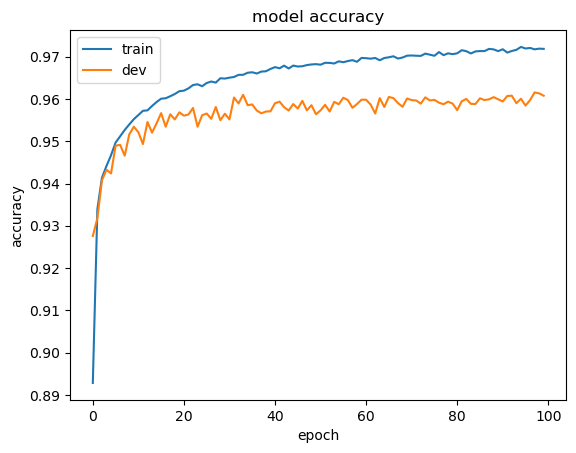

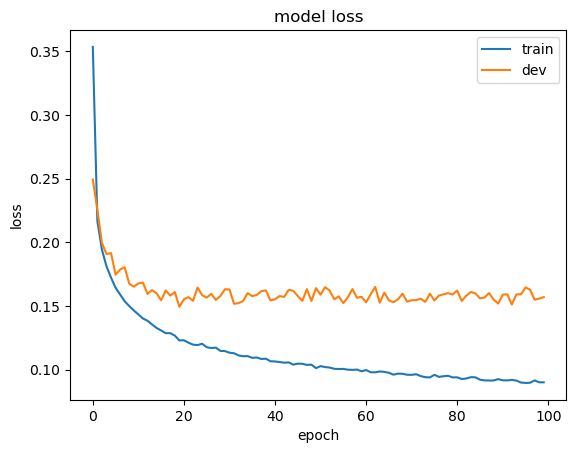

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [25]:
y_train.reset_index(drop=True,inplace=True)
dict_match = {}
for i in range(169777):
    dict_match[y_train[i]] = y_train_1_hot[i]
    
modified_dict = {key: np.argmax(value,-1) for key, value in dict_match.items()}
y_dev_num = y_dev.replace(modified_dict) 
y_dev_num.reset_index(drop=True,inplace=True)
labels = train_windows.Wi_POS_tag.unique()
labels = labels[labels != 'SYM']
labels

array(['DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADJ', 'AUX', 'ADV',
       'VERB', 'PRON', 'CCONJ', 'SCONJ', 'NUM', 'X', 'INTJ'], dtype=object)

In [26]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(256, input_dim = X_train.shape[1],
                  activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(len(list(train_windows.Wi_POS_tag.unique())),  activation='softmax'))

# Load weights from the pre-trained model
model.load_weights("checkpoints/weights.hdf5")
# model.compile(
#     loss='categorical_crossentropy',
#     optimizer=Adam(lr=0.001),
#     metrics=["accuracy"]
#     )

In [27]:
from sklearn.metrics import roc_auc_score

y_train.reset_index(drop=True,inplace=True)
dict_match = {}
for i in range(169777):
    dict_match[y_train[i]] = y_train_1_hot[i]
    
modified_dict = {key: np.argmax(value,-1) for key, value in dict_match.items()}
labels = train_windows.Wi_POS_tag.unique()

def print_metrics(X, y, labels, set_name):
    
    if set_name != "Training Set":
        labels = labels[labels != 'SYM']
        
    y_num = y.replace(modified_dict) 
    y_num.reset_index(drop=True,inplace=True)
    
    predictions = np.argmax(model.predict(X), -1)
    print(f"-----------Predection Scores for {set_name}-----------")
    print("Classification Report")
    print(classification_report(y_num, predictions,
                                target_names=labels))
    print("AUC Scores for Classes")
    y_probs = model.predict(X_dev)
    n_classes = len(labels)
    macro_auc = 0
    for i in range(n_classes):
        class_indices = (y_dev_num == i)
        if any(class_indices):
            class_auc = roc_auc_score((y_dev_num == i).astype(int), y_probs[:, i])
            print(f"AUC for class {labels[i]}: {class_auc}")
            macro_auc += class_auc
    macro_auc = macro_auc/n_classes
    print(f"Macro AUC: {macro_auc}")

print_metrics(X_train, y_train, labels, "Training Set")

5306/5306 [==============================] - 19s 3ms/step
-----------Predection Scores for Training Set-----------
Classification Report
              precision    recall  f1-score   support

         DET       0.97      0.96      0.97     14945
        NOUN       1.00      1.00      1.00     19944
         ADP       0.96      0.98      0.97      8361
       PROPN       0.98      0.99      0.98      7259
       PUNCT       0.98      0.97      0.98      6640
         ADJ       0.99      0.99      0.99     17129
         AUX       0.64      0.88      0.74        33
         ADV       0.99      0.99      0.99     40002
        VERB       0.97      0.98      0.97      3955
        PRON       0.94      0.95      0.94      6332
       CCONJ       1.00      1.00      1.00      9013
       SCONJ       1.00      1.00      1.00     18128
         NUM       0.85      0.85      0.85      1795
           X       1.00      0.89      0.94         9
        INTJ       0.98      0.97      0.97     1599

In [28]:
print_metrics(X_dev, y_dev, labels, "Development Set")

670/670 [==============================] - 2s 3ms/step
-----------Predection Scores for Development Set-----------
Classification Report
              precision    recall  f1-score   support

         DET       0.91      0.91      0.91      2258
        NOUN       0.99      0.99      0.99      3064
         ADP       0.93      0.97      0.95       832
       PROPN       0.98      0.98      0.98       850
       PUNCT       0.95      0.94      0.95       739
         ADJ       0.98      0.98      0.98      1864
         AUX       0.50      0.33      0.40         3
         ADV       0.98      0.96      0.97      5946
        VERB       0.95      0.94      0.95       515
        PRON       0.91      0.92      0.92       898
       CCONJ       0.92      0.97      0.94       334
       SCONJ       1.00      1.00      1.00      2041
         NUM       0.70      0.80      0.75       173
           X       0.93      0.94      0.93      1867
        INTJ       0.67      0.73      0.70        4

In [29]:
print_metrics(X_test, y_test, labels, "Test Set")

628/628 [==============================] - 2s 3ms/step
-----------Predection Scores for Test Set-----------
Classification Report
              precision    recall  f1-score   support

         DET       0.89      0.89      0.89      1403
        NOUN       0.99      0.99      0.99      2248
         ADP       0.92      0.96      0.94      1182
       PROPN       0.97      0.98      0.97       999
       PUNCT       0.98      0.93      0.96       752
         ADJ       0.98      0.98      0.98      2097
         AUX       0.64      0.88      0.74         8
         ADV       0.97      0.97      0.97      4287
        VERB       0.92      0.93      0.92       342
        PRON       0.90      0.88      0.89      1047
       CCONJ       0.98      0.99      0.98      1127
       SCONJ       1.00      1.00      1.00      2152
         NUM       0.71      0.81      0.76       315
           X       0.95      0.94      0.94      2075
        INTJ       0.54      0.56      0.55        34

    